In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from app_store_scraper import AppStore

In [14]:
brilliant = AppStore(country='us', app_name='brilliant', app_id = '913335252')

2023-04-11 08:17:11,030 [INFO] Base - Initialised: AppStore('us', 'brilliant', 913335252)
2023-04-11 08:17:11,031 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/brilliant/id913335252


In [17]:
brilliant.review(how_many=10000)

2023-04-11 08:18:52,510 [INFO] Base - [id:913335252] Fetched 440 reviews (440 fetched in total)
2023-04-11 08:18:58,399 [INFO] Base - [id:913335252] Fetched 800 reviews (800 fetched in total)
2023-04-11 08:19:03,917 [INFO] Base - [id:913335252] Fetched 1120 reviews (1120 fetched in total)
2023-04-11 08:19:09,598 [INFO] Base - [id:913335252] Fetched 1460 reviews (1460 fetched in total)
2023-04-11 08:19:15,074 [INFO] Base - [id:913335252] Fetched 1760 reviews (1760 fetched in total)
2023-04-11 08:19:20,679 [INFO] Base - [id:913335252] Fetched 2100 reviews (2100 fetched in total)
2023-04-11 08:19:26,189 [INFO] Base - [id:913335252] Fetched 2420 reviews (2420 fetched in total)
2023-04-11 08:19:30,530 [INFO] Base - [id:913335252] Fetched 2627 reviews (2627 fetched in total)


In [31]:
brilliant.reviews[2622]['developerResponse']

{'id': 945521,
 'body': '[Edit: if the formatting here is too hard to read, I\'m happy to send in a better format if you email support@brilliant.org] Hi Young bob 37,\n\nFirst, thank you very much for taking the time to write in with your feedback. The only way Brilliant will get better is if people like you spend the time on something like this. If you have more feedback – please write to support@brilliant.org.\n\n\nOn to the substance of your feedback:\n\nYou write: "The linear algebra module in quantitative finance is lacking a lot of basic explanations." The target audience for this course are people prepping for jobs/interviews in the quant finance industry. Therefore, the course participant is expected to be be familiar with most of these concepts already, and the Brilliant wiki + other courses (like Probability) support this. We could make this more clear for sure, but we definitely encourage you to use the app search to find other content when you get stuck.\n\nYou write: "In d

In [33]:
brilliantdf = pd.DataFrame(np.array(brilliant.reviews),columns=['review'])
brilliantdata = pd.DataFrame(brilliantdf.pop('review').tolist())

In [47]:
percOf1 = sum(brilliantdata['rating'] == 1)/len(brilliantdata)
percOf2 = sum(brilliantdata['rating'] == 2)/len(brilliantdata)
percOf3 = sum(brilliantdata['rating'] == 3)/len(brilliantdata)
percOf4 = sum(brilliantdata['rating'] == 4)/len(brilliantdata)
percOf5 = sum(brilliantdata['rating'] == 5)/len(brilliantdata)

0.06813856109630757 0.02169775409212029 0.04377617053673392 0.11077274457556148 0.7556147696992768


([<matplotlib.patches.Wedge at 0x7fbea167ebe0>,
 [Text(1.0748933173578175, 0.23367575034544452, '1 Star'),
  Text(0.9672892824706173, 0.523785685197179, '2 Stars'),
  Text(0.8399180190324808, 0.710308187552807, '3 Stars'),
  Text(0.4113624496887437, 1.0201867157467186, '4 Stars'),
  Text(-0.7914159475983537, -0.7639769616205715, '5 Stars')])

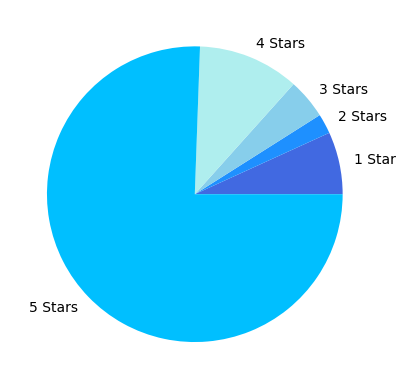

In [72]:
print(percOf1, percOf2, percOf3, percOf4, percOf5)
labels = '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'
sizes = [percOf1, percOf2, percOf3, percOf4, percOf5]
fig, ax = plt.subplots()
colors = ['deepskyblue','paleturquoise','skyblue','dodgerblue','royalblue']
colors.reverse()
ax.pie(sizes, labels=labels, colors = colors)

(array([ 179.,    0.,   57.,    0.,    0.,  115.,    0.,  291.,    0.,
        1985.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

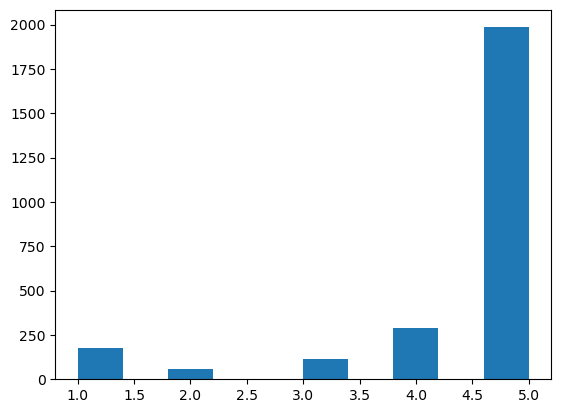

In [41]:
plt.hist(brilliantdata['rating'])